<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
xcv, xtest,ycv, ytest = train_test_split(xtest, ytest, test_size=0.3, random_state=0)

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
print(xtest.shape, ytest.shape, xcv.shape, ycv.shape)

(3500, 5) (3500,) (450, 5) (450,)
(450, 5) (450,) (1050, 5) (1050,)


In [4]:
clf = SVC(random_state=0, decision_function_shape='ovo')

clf = GridSearchCV(clf, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001,0.01, 0.1, 1, 10, 100]}, n_jobs=-1, cv=5)
clf = clf.fit(xtrain, ytrain)  # set the best parameters

In [5]:
clf.best_estimator_, clf.best_score_

(SVC(C=100, decision_function_shape='ovo', gamma=1, random_state=0),
 0.9394285714285715)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [6]:
clf = SVC(random_state=0, gamma=1, C=100, decision_function_shape='ovo')

clf.fit(xtrain, ytrain)

pred = clf.predict(xcv)

clf_dec = clf.decision_function(xcv)

In [7]:
def decision_function(clf, data):
    add_intercept = []

    for x_q in data:
        add_intercept.append(np.sum(clf.dual_coef_ * np.exp(-clf._gamma*np.sum((clf.support_vectors_ - x_q)**2, axis=1))) + clf.intercept_[0])
    return add_intercept

fcv = decision_function(clf, xcv)

print(fcv[:5], '\n', clf_dec[:5])

[-1.2615415501507021, -1.1703596219479158, -1.3159367087032825, -1.5034977523157584, -0.6440073630763044] 
 [-1.26154155 -1.17035962 -1.31593671 -1.50349775 -0.64400736]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


In [8]:
unique, frequency = np.unique(ytrain, return_counts = True)  
count = np.asarray((unique, frequency ))

print(count)

[[   0    1]
 [2471 1029]]


In [9]:
neg, pos = frequency[0], frequency[1]

def target_calib(x):
    cal_target = []
    for i in x:
        if i == 1:
            cal_target.append((pos + 1)/(pos + 2))
        elif i == 0:
            cal_target.append(1 / (neg + 2))
    return cal_target

claibrated_target = target_calib(pred.tolist())

## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [10]:
def initialize_weights(dim):
    w = np.zeros_like((dim))
    b = np.zeros_like((1))
    print("Weights-Initialized : ", w.shape)
    return w,b

def sigmoid(z):
    sigmoid = 1/(1+math.exp(-z))
    return sigmoid

def logloss(W, b, X, Y):
    N = len(X)
    loss=[]
    for i in range(N):
        z = np.dot(X[i],W) + b
        pred = sigmoid(z)
        if pred < 0.5:
            l = (1-Y[i])*np.log10(1-pred)
            loss.append(l)
        else:
            l = Y[i]*np.log10(pred)
            loss.append(l)
    loss = (-1 * 1/len(loss) * sum(loss))
    return loss

def gradient_dw(x,y,w,b,alpha,N):
    dw =x*(y-sigmoid(np.dot(w,x)+b)) - alpha/N * w
    return dw

def gradient_db(x,y,w,b):
    db =(y-sigmoid(np.dot(w,x)+b))
    return db

def pred(w,b, X):
    N = len(X.tolist())
    predict = []
    for i in range(N):
        z = np.dot(X[i],w) + b
        predict.append(sigmoid(z))

    return np.array(predict)

In [11]:
def train(Y_calibrated,fcv,epochs,alpha,eta0):

    ''' In this function, we will implement logistic regression'''
    scale_down_factor = 0.0001
    epoch = 1
    w, b = initialize_weights(1)
    wl = []
    bl = []
    
    Lw=np.zeros_like(1)
    Lb=0
    
    loss = 0
    prev = 0
    train_loss = []
    test_loss = []
    
    while epoch <= epochs:
        
        y_train_pred = []
        y_test_pred = []
        np.random.RandomState(seed=2)
        
        for m in range(len(Y_calibrated)):
            
            i = np.random.choice(len(Y_calibrated))
            z = np.dot(Y_calibrated[i],w) + b
            
            Lw = gradient_dw(Y_calibrated[i],fcv[i],w,b,alpha,len(Y_calibrated))
            Lb = gradient_db(Y_calibrated[i],fcv[i],w,b)
            
            w=(1-(alpha * scale_down_factor/epochs))*w+alpha*Lw
            b=b+alpha*Lb
            
        train_loss.append(round(logloss(w,b,Y_calibrated, fcv), 3))
        
        if train_loss[-1] == prev:
            break;
        else:
            prev = train_loss[-1]
            print("Epoch: %d, train_Loss: %.3f" %(epoch, train_loss[-1]))
            epoch+=1
        
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.plot(train_loss, label='train_log_loss')
    plt.grid()
    plt.legend() 
    plt.title('Log loss vs epoch')
    plt.xlabel('Iterations')
    plt.ylabel('log loss')
    plt.show()
        
    return w,b

Weights-Initialized :  ()
Epoch: 1, train_Loss: 0.413
Epoch: 2, train_Loss: 0.376
Epoch: 3, train_Loss: 0.340
Epoch: 4, train_Loss: 0.305
Epoch: 5, train_Loss: 0.274
Epoch: 6, train_Loss: 0.247
Epoch: 7, train_Loss: 0.222
Epoch: 8, train_Loss: 0.199
Epoch: 9, train_Loss: 0.178
Epoch: 10, train_Loss: 0.158
Epoch: 11, train_Loss: 0.140
Epoch: 12, train_Loss: 0.122
Epoch: 13, train_Loss: 0.106
Epoch: 14, train_Loss: 0.090
Epoch: 15, train_Loss: 0.076
Epoch: 16, train_Loss: 0.063
Epoch: 17, train_Loss: 0.050
Epoch: 18, train_Loss: 0.039
Epoch: 19, train_Loss: 0.028
Epoch: 20, train_Loss: 0.018
Epoch: 21, train_Loss: 0.009
Epoch: 22, train_Loss: 0.001
Epoch: 23, train_Loss: -0.008
Epoch: 24, train_Loss: -0.015
Epoch: 25, train_Loss: -0.023
Epoch: 26, train_Loss: -0.029
Epoch: 27, train_Loss: -0.034
Epoch: 28, train_Loss: -0.040
Epoch: 29, train_Loss: -0.045
Epoch: 30, train_Loss: -0.050
Epoch: 31, train_Loss: -0.054
Epoch: 32, train_Loss: -0.057
Epoch: 33, train_Loss: -0.061
Epoch: 34, trai

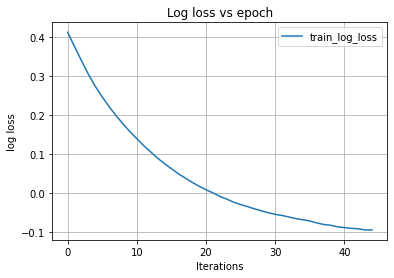

In [12]:
alpha=0.0001
eta0=0.0001
N=len(xcv)
epochs=50

w,b = train(claibrated_target,fcv,epochs,alpha,eta0)

In [13]:
w, b

(3.2319771056507998, -3.5624776230671333)

In [14]:
f_test = decision_function(clf, xtest)

def calibrated_test(ftest, weight, bias):
    test_prediction = []
    for i in ftest:
        z = np.dot(i,weight) + bias
        test_prediction.append(sigmoid(z))
    return np.array(test_prediction)
test_pred = calibrated_test(f_test, w, b)

print(test_pred[:5])

[8.45382499e-01 3.89597708e-02 5.02809000e-06 5.15371386e-05
 6.28412748e-04]


__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
